####################
July 2nd, 2025
Balancing coolers

Loading in some libraries

In [2]:
import sys
import gzip
import matplotlib.pyplot as plt
import numpy as np
import cooler
import pandas as pd
import cooltools

Ploting the unbalanced merged diploid cooler

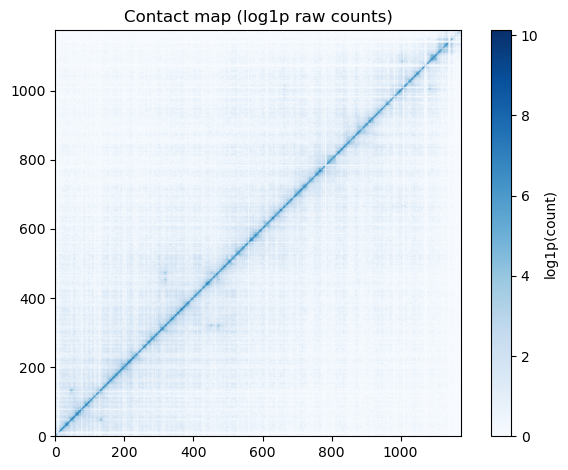

In [3]:
clr = cooler.Cooler("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250403_PnMs_merged_diploidGenome.20kb.cool")

mat = clr.matrix(balance=False).fetch("2L_JJg14_057")

plt.imshow(np.log1p(mat), cmap="Blues", origin="lower")
plt.title("Contact map (log1p raw counts)")
plt.colorbar(label='log1p(count)')
plt.tight_layout()
plt.show()

Balancing the cooler

In [4]:
cool_path = "/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250403_PnMs_merged_diploidGenome.20kb.cool"
balanced_cool_path = "/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250403_PnMs_merged_balanced.20kb.cool"

chromsizes_path = "/data/alhajabed/FlyHiC/PoreC/diploid_genome.chromsizes"
chromsizes = pd.read_csv(chromsizes_path, sep="\t", header=None, names=["chrom", "size"])

clr = cooler.Cooler(cool_path)

mat = clr.matrix(balance=False).fetch("2L_JJg14_057")
print("NaNs present:", np.isnan(mat).any())
print("Zeros on diagonal:", np.any(np.diag(mat) == 0))
print("Rows with all zeros:", np.sum(np.all(mat == 0, axis=1)))
print("Cols with all zeros:", np.sum(np.all(mat == 0, axis=0)))

# Run balancing
weights, stats = cooler.balance_cooler(clr, max_iters=1000, tol=1e-5)

print("Balancing stats:", stats)
print("Weights head:", weights[:10])

# Attach weights to the bins table
bins = clr.bins()[:]
bins["weight"] = weights  



# Save the balanced cooler file
cooler.create_cooler(
    balanced_cool_path,
    bins=bins,
    pixels=clr.pixels()[:],
    metadata={"chromsizes": dict(zip(chromsizes["chrom"], chromsizes["size"]))}  # Add chromsizes to metadata
)

print(f"Balanced cooler saved to {balanced_cool_path}")

clr_cool = cooler.Cooler(balanced_cool_path)
print(clr_cool.info)

NaNs present: False
Zeros on diagonal: True
Rows with all zeros: 1
Cols with all zeros: 1


/localenv/erikson/anaconda/envs/PoreC/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/localenv/erikson/anaconda/envs/PoreC/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Balancing stats: {'tol': 1e-05, 'min_nnz': 10, 'min_count': 0, 'mad_max': 5, 'cis_only': False, 'ignore_diags': 2, 'scale': 145220.78194863952, 'converged': True, 'var': 9.792406124760614e-06, 'divisive_weights': False}
Weights head: [0.01510998 0.02115341 0.01241457 0.01765326 0.01344857 0.01019319
        nan        nan        nan        nan]
Balanced cooler saved to /data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250403_PnMs_merged_balanced.20kb.cool
{'bin-size': 20000, 'bin-type': 'fixed', 'creation-date': '2025-07-02T13:48:32.304436', 'format': 'HDF5::Cooler', 'format-url': 'https://github.com/open2c/cooler', 'format-version': 3, 'generated-by': 'cooler-0.10.2', 'genome-assembly': 'unknown', 'metadata': {'chromsizes': {'2L_JJg14_057': 23513712, '2R_JJg14_057': 25286936, '3L_JJg14_057': 28110227, '3R_JJg14_057': 32079331, '4_JJg14_057': 1348131, 'X_JJg14_057': 23542271, 'Y_JJg14_057': 3667352, 'dmel_mitochondrion_genome_JJg14_057': 19517, 'Unmapped_Scaffold_8_JJg14_057': 887

From terminal:
cooler zoomify 20250403_PnMs_merged_balanced.20kb.cool -o 20250403_PnMs_balanced.mcool --resolutions 20000,40000,80000,160000
cooler zoomify 20250403_PnMs_merged_balanced.20kb.cool -o 20250403_PnMs_merged_balanced.20kb.mcool --resolutions 20000,40000,80000,160000


Plotting the balanced cool file

Matrix stats:
Max value: 24921
Min value: 0
NaNs present: False
Rows with all zeros: 1
Columns with all zeros: 1


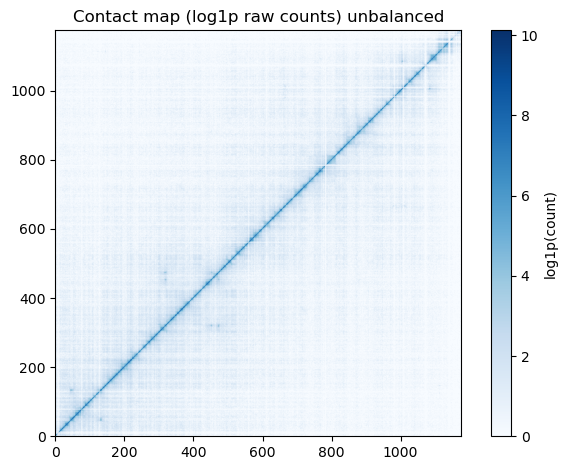

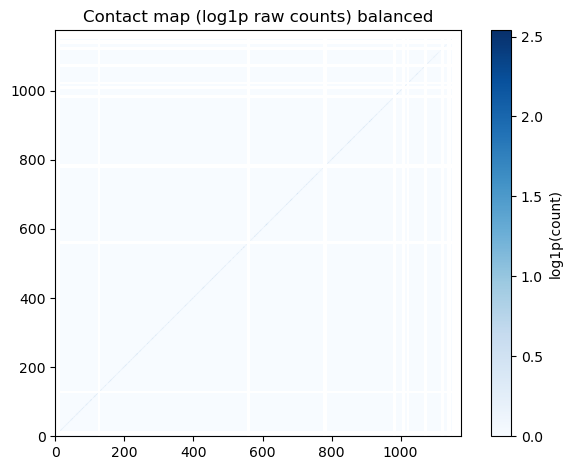

In [ ]:
clr = cooler.Cooler("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250403_PnMs_merged_balanced.20kb.cool")


mat = clr.matrix(balance=False).fetch("2L_JJg14_057")

print("Matrix stats:")
print(f"Max value: {np.max(mat)}")
print(f"Min value: {np.min(mat)}")
print(f"NaNs present: {np.isnan(mat).any()}")
print(f"Rows with all zeros: {np.sum(np.all(mat == 0, axis=1))}")
print(f"Columns with all zeros: {np.sum(np.all(mat == 0, axis=0))}")

plt.imshow(np.log1p(mat), cmap="Blues", origin="lower")
plt.title("Contact map (log1p raw counts) unbalanced")
plt.colorbar(label='log1p(count)')
plt.tight_layout()
plt.show()

mat = clr.matrix(balance=True).fetch("2L_JJg14_057")
mat = np.clip(mat, 0, np.percentile(mat, 99))  

plt.imshow(np.log1p(mat), cmap="Blues", origin="lower")
plt.title("Contact map (log1p raw counts) balanced")
plt.colorbar(label='log1p(count)')
plt.tight_layout()
plt.show()



Balancing at 40k resolution

In [6]:
cool_path = "/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250403_PnMs_merged_diploidGenome.40kb.cool"
balanced_cool_path = "/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250403_PnMs_merged_balanced.40kb.cool"

chromsizes_path = "/data/alhajabed/FlyHiC/PoreC/diploid_genome.chromsizes"
chromsizes = pd.read_csv(chromsizes_path, sep="\t", header=None, names=["chrom", "size"])

clr = cooler.Cooler(cool_path)

mat = clr.matrix(balance=False).fetch("2L_JJg14_057")
print("NaNs present:", np.isnan(mat).any())
print("Zeros on diagonal:", np.any(np.diag(mat) == 0))
print("Rows with all zeros:", np.sum(np.all(mat == 0, axis=1)))
print("Cols with all zeros:", np.sum(np.all(mat == 0, axis=0)))

# Run balancing
weights, stats = cooler.balance_cooler(clr, max_iters=1000, tol=1e-5)

print("Balancing stats:", stats)
print("Weights head:", weights[:10])

# Attach weights to the bins table
bins = clr.bins()[:]
bins["weight"] = weights  



# Save the balanced cooler file
cooler.create_cooler(
    balanced_cool_path,
    bins=bins,
    pixels=clr.pixels()[:],
    metadata={"chromsizes": dict(zip(chromsizes["chrom"], chromsizes["size"]))}  # Add chromsizes to metadata
)

print(f"Balanced cooler saved to {balanced_cool_path}")

clr_cool = cooler.Cooler(balanced_cool_path)
print(clr_cool.info)

NaNs present: False
Zeros on diagonal: True
Rows with all zeros: 1
Cols with all zeros: 1


/localenv/erikson/anaconda/envs/PoreC/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/localenv/erikson/anaconda/envs/PoreC/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Balancing stats: {'tol': 1e-05, 'min_nnz': 10, 'min_count': 0, 'mad_max': 5, 'cis_only': False, 'ignore_diags': 2, 'scale': 145220.78194863952, 'converged': True, 'var': 9.792406124760614e-06, 'divisive_weights': False}
Weights head: [0.01510998 0.02115341 0.01241457 0.01765326 0.01344857 0.01019319
        nan        nan        nan        nan]
Balanced cooler saved to /data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250403_PnMs_merged_balanced.40kb.cool
{'bin-size': 20000, 'bin-type': 'fixed', 'creation-date': '2025-07-02T13:58:15.216218', 'format': 'HDF5::Cooler', 'format-url': 'https://github.com/open2c/cooler', 'format-version': 3, 'generated-by': 'cooler-0.10.2', 'genome-assembly': 'unknown', 'metadata': {'chromsizes': {'2L_JJg14_057': 23513712, '2R_JJg14_057': 25286936, '3L_JJg14_057': 28110227, '3R_JJg14_057': 32079331, '4_JJg14_057': 1348131, 'X_JJg14_057': 23542271, 'Y_JJg14_057': 3667352, 'dmel_mitochondrion_genome_JJg14_057': 19517, 'Unmapped_Scaffold_8_JJg14_057': 887

Plotting the 40kb

Matrix stats:
Max value: 24921
Min value: 0
NaNs present: False
Rows with all zeros: 1
Columns with all zeros: 1


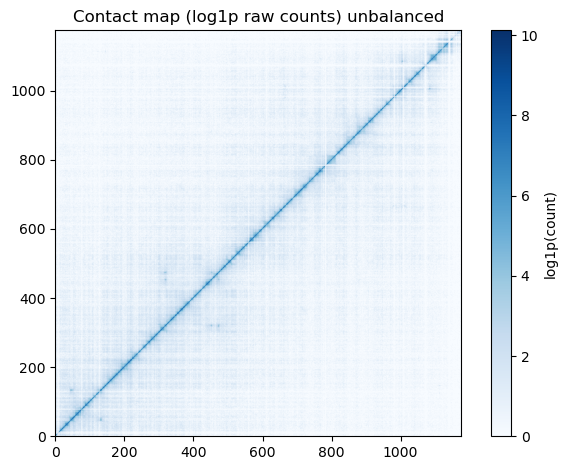

Matrix stats:
Max value: nan
Min value: nan
NaNs present: True
Rows with all zeros: 0
Columns with all zeros: 0


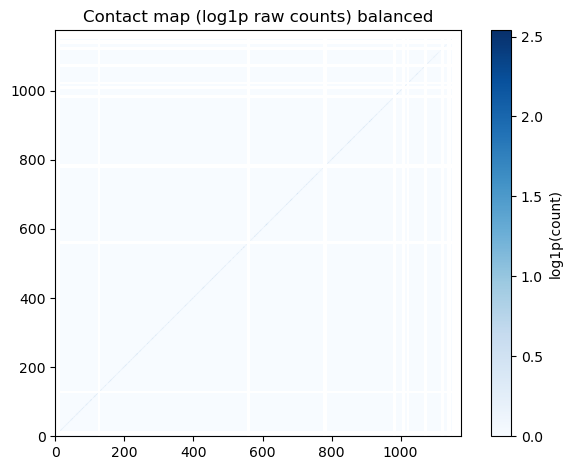

In [8]:
clr = cooler.Cooler("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250403_PnMs_merged_balanced.40kb.cool")

mat = clr.matrix(balance=False).fetch("2L_JJg14_057")

print("Matrix stats:")
print(f"Max value: {np.max(mat)}")
print(f"Min value: {np.min(mat)}")
print(f"NaNs present: {np.isnan(mat).any()}")
print(f"Rows with all zeros: {np.sum(np.all(mat == 0, axis=1))}")
print(f"Columns with all zeros: {np.sum(np.all(mat == 0, axis=0))}")

plt.imshow(np.log1p(mat), cmap="Blues", origin="lower")
plt.title("Contact map (log1p raw counts) unbalanced")
plt.colorbar(label='log1p(count)')
plt.tight_layout()
plt.show()


mat = clr.matrix(balance=True).fetch("2L_JJg14_057")

print("Matrix stats:")
print(f"Max value: {np.max(mat)}")
print(f"Min value: {np.min(mat)}")
print(f"NaNs present: {np.isnan(mat).any()}")
print(f"Rows with all zeros: {np.sum(np.all(mat == 0, axis=1))}")
print(f"Columns with all zeros: {np.sum(np.all(mat == 0, axis=0))}")

plt.imshow(np.log1p(mat), cmap="Blues", origin="lower")
plt.title("Contact map (log1p raw counts) balanced")
plt.colorbar(label='log1p(count)')
plt.tight_layout()
plt.show()

Balancing works but the matrix looks strange, rebalancing after blacklisting the abnormally low and abnormally high regions, maybe the repetitive sequences is throwing the balancing off 

In [9]:
clr = cooler.Cooler("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250403_PnMs_merged_diploidGenome.20kb.cool")
bins = clr.bins()[:]
bin_size = clr.info['bin-size']  


# Compute per-bin coverage (sum of contacts for each bin)
matrix = clr.matrix(balance=False)[:]
coverage = matrix.sum(axis=0)  # Sum contacts for each bin


# Define thresholds
low_thresh = np.percentile(coverage[coverage > 0], 2)  # 2nd percentile (excluding 0s)
high_thresh = np.percentile(coverage, 99)              # 99th percentile (extreme high)

# Mask bins
low_coverage_mask = (coverage <= low_thresh) | (coverage == 0)
high_coverage_mask = (coverage >= high_thresh)

# Combine masks
blacklist_mask = low_coverage_mask | high_coverage_mask
blacklisted_bins = bins[blacklist_mask]

# Export to BED
bed = blacklisted_bins[['chrom', 'start', 'end']]
bed.to_csv("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/drosophila_blacklist.bed", sep='\t', header=False, index=False)

# Optional: Print stats
print(f"Total bins: {len(bins)}")
print(f"Low coverage bins: {np.sum(low_coverage_mask)}")
print(f"High coverage bins: {np.sum(high_coverage_mask)}")
print(f"Total blacklisted bins: {len(bed)}")

Total bins: 17634
Low coverage bins: 1206
High coverage bins: 177
Total blacklisted bins: 1383



(PoreC) erikson@deep22:/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools$ cooler balance 20250403_PnMs_merged_diploidGenome.20kb.cool --blacklist drosophila_blacklist.bed --mad-max 5 --min-nnz 10 --max-iters 10000 --tol 1e-4
INFO:cooler.balance:variance is 0.00010877307482715734
INFO:cooler.balance:variance is 0.00010050269678965142
INFO:cooler.balance:variance is 9.28588661426533e-05

Plotting the new balanced cooler

Matrix stats:
Max value: 24921
Min value: 0
NaNs present: False
Rows with all zeros: 1
Columns with all zeros: 1


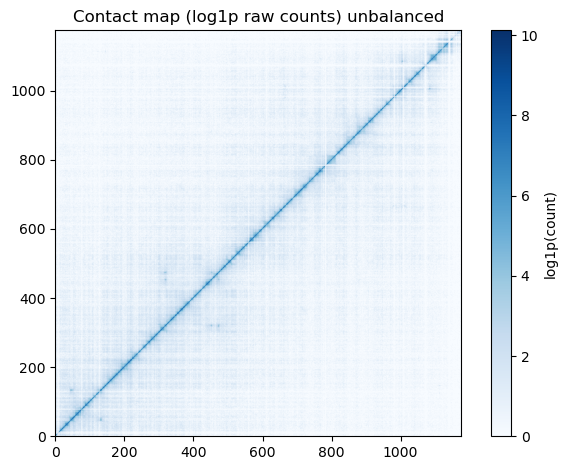

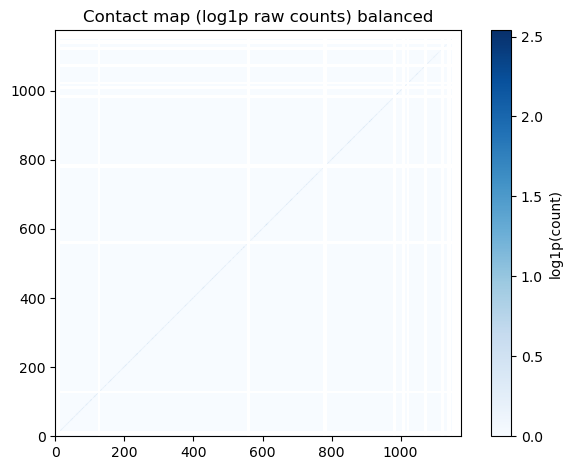

In [10]:
clr = cooler.Cooler("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250403_PnMs_merged_balanced.20kb.cool")


mat = clr.matrix(balance=False).fetch("2L_JJg14_057")

print("Matrix stats:")
print(f"Max value: {np.max(mat)}")
print(f"Min value: {np.min(mat)}")
print(f"NaNs present: {np.isnan(mat).any()}")
print(f"Rows with all zeros: {np.sum(np.all(mat == 0, axis=1))}")
print(f"Columns with all zeros: {np.sum(np.all(mat == 0, axis=0))}")

plt.imshow(np.log1p(mat), cmap="Blues", origin="lower")
plt.title("Contact map (log1p raw counts) unbalanced")
plt.colorbar(label='log1p(count)')
plt.tight_layout()
plt.show()

mat = clr.matrix(balance=True).fetch("2L_JJg14_057")
mat = np.clip(mat, 0, np.percentile(mat, 99))  

plt.imshow(np.log1p(mat), cmap="Blues", origin="lower")
plt.title("Contact map (log1p raw counts) balanced")
plt.colorbar(label='log1p(count)')
plt.tight_layout()
plt.show()


P(s) curves

INFO:root:creating a Pool of 2 workers
/tmp/ipykernel_59219/3854941717.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cvd_smooth_agg['balanced.avg.smoothed'].loc[cvd_smooth_agg['dist'] < 2] = np.nan


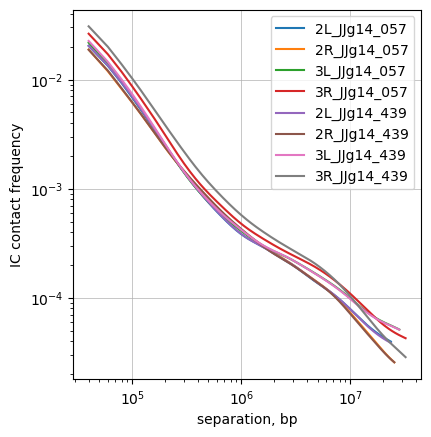

In [ ]:
#chroms = ["2L_JJg14_057", "2L_JJg14_439", "2R_JJg14_057", "2R_JJg14_439"]  
chromsizes_path = "/data/alhajabed/FlyHiC/PoreC/diploid_genome.chromsizes.v2"
chromsizes = pd.read_csv(chromsizes_path, sep="\t", header=None, names=["chrom", "size"])

clr = cooler.Cooler("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250403_PnMs_merged_diploidGenome.20kb.cool")

# compute P(s) curves
cvd_smooth_agg = cooltools.expected_cis(
    clr=clr,
    view_df=None,
    smooth=True,
    aggregate_smoothed=True,
    smooth_sigma=0.1,
    nproc=2
    )

# filter short distances
cvd_smooth_agg['balanced.avg.smoothed'].loc[cvd_smooth_agg['dist'] < 2] = np.nan

# plot
fig, ax = plt.subplots(1,1)

for region in chromsizes['chrom']:
    ax.loglog(
        cvd_smooth_agg['dist_bp'].loc[cvd_smooth_agg['region1']==region],
        cvd_smooth_agg['balanced.avg.smoothed'].loc[cvd_smooth_agg['region1']==region],
    )
    ax.set(
        xlabel='separation, bp',
        ylabel='IC contact frequency')
    ax.set_aspect(1.0)
    ax.grid(lw=0.5)

ax.legend(chromsizes['chrom'], loc='upper right')

Rebalancing  from scratch, overwriting the old (possibly broken) weights

cooler balance --mad-max 5 --ignore-diags 2 --max-iters 10000 --force 20250403_PnMs_merged_diploidGenome.20kb.cool

--force: overwrites the existing weight column

--mad-max 5: masks bins with outlier weights

--ignore-diags 2: ignores the main diagonal + first 2, which are often noisy

--max-iters 10000: More iterations so we don't get the "Iteration limit reached without convergence"

INFO:cooler.balance:variance is 9.792406124760614e-06

extracting the weights:

cooler dump --table bins --columns chrom,start,end,weight 20250403_PnMs_merged_diploidGenome.20kb.cool --header >20250403_PnMs_merged_diploidGenome.20kb.weights.txt


Ploting a histogram with the weights

          chrom  start     end    weight
0  2L_JJg14_057      0   20000  0.015110
1  2L_JJg14_057  20000   40000  0.021153
2  2L_JJg14_057  40000   60000  0.012415
3  2L_JJg14_057  60000   80000  0.017653
4  2L_JJg14_057  80000  100000  0.013449


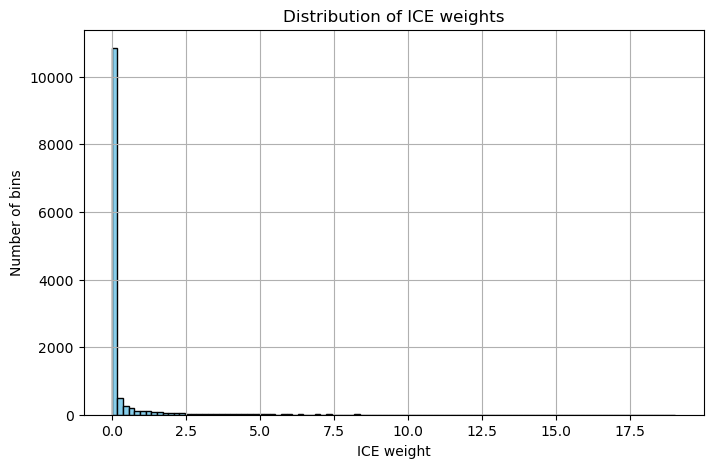

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load weights file (adjust path if needed)
df = pd.read_csv("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250403_PnMs_merged_diploidGenome.20kb.weights.txt", sep="\t")

# Check column names and data
print(df.head())

# The weight column might have missing entries; convert to numeric and drop NaNs
df['weight'] = pd.to_numeric(df['weight'], errors='coerce')
weights = df['weight'].dropna()

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(weights, bins=100, color='skyblue', edgecolor='black')
plt.xlabel("ICE weight")
plt.ylabel("Number of bins")
plt.title("Distribution of ICE weights")
plt.grid(True)
plt.show()

ICE weights are at or near zero, that usually means:

Those bins were masked out during balancing because they had very low or no coverage (few or zero contacts).

ICE sets their weights to zero (or effectively excludes them) since they don’t have enough data to reliably normalize.

These bins correspond to problematic regions — like repetitive DNA, assembly gaps, or low mappability.

Compute per bin coverage

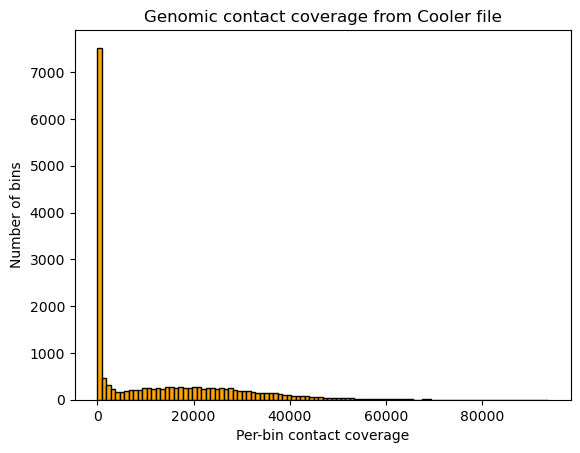

In [3]:
import cooler
import pandas as pd
import matplotlib.pyplot as plt

# Load your cooler file
clr = cooler.Cooler("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250403_PnMs_merged_diploidGenome.20kb.cool")

# Get bin info
bins = clr.bins()[:]

# Get pixel info
pixels = clr.pixels()[:]

# Count how often each bin appears (as bin1 or bin2)
bin1_counts = pixels.groupby("bin1_id")["count"].sum()
bin2_counts = pixels.groupby("bin2_id")["count"].sum()

# Total coverage per bin = sum of bin1 and bin2 contributions
coverage = bin1_counts.add(bin2_counts, fill_value=0)

# Add to bins dataframe
bins["coverage"] = coverage

# Plot histogram of coverage
bins["coverage"].fillna(0, inplace=True)
plt.hist(bins["coverage"], bins=100, color="orange", edgecolor="black")
plt.xlabel("Per-bin contact coverage")
plt.ylabel("Number of bins")
plt.title("Genomic contact coverage from Cooler file")
plt.show()

Plotting oer chromosome summary


=== Per-chromosome coverage summary ===
                           total_coverage  mean_coverage  median_coverage  \
chrom                                                                       
2L_JJg14_057                   26545128.0   22572.387755          22192.5   
2R_JJg14_057                   25662550.0   20286.600791          20207.0   
3L_JJg14_057                   28905916.0   20558.972973          21173.0   
3R_JJg14_057                   43280544.0   26982.882793          26998.0   
4_JJg14_057                       12642.0     185.911765             19.0   
...                                   ...            ...              ...   
211000022278179_JJg14_439             0.0            NaN              NaN   
211000022278384_JJg14_439             0.0            NaN              NaN   
211000022278495_JJg14_439             0.0            NaN              NaN   
211000022280427_JJg14_439             0.0            NaN              NaN   
211000022279089_JJg14_439          

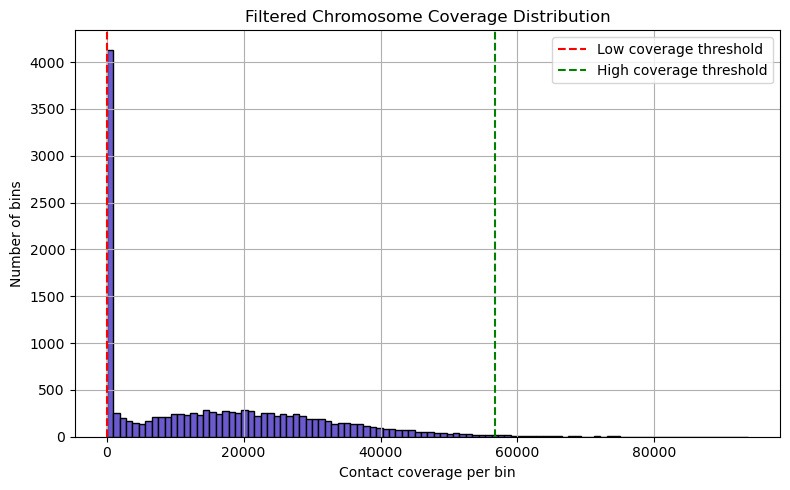

In [6]:
import cooler
import pandas as pd
import matplotlib.pyplot as plt

# Load your .cool file
cool_path = "/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250403_PnMs_merged_diploidGenome.20kb.cool"
clr = cooler.Cooler(cool_path)

# Load bins and pixel data
bins = clr.bins()[:].copy()
pixels = clr.pixels()[:]

# Filter to include only the target chromosomes
target_chromosomes = [
    "2L_JJg14_439", "2R_JJg14_439", "3L_JJg14_439", "3R_JJg14_439",
    "4_JJg14_439", "X_JJg14_439", "Y_JJg14_439",
    "2L_JJg14_057", "2R_JJg14_057", "3L_JJg14_057", "3R_JJg14_057",
    "4_JJg14_057", "X_JJg14_057", "Y_JJg14_057"
]
bins = bins[bins["chrom"].isin(target_chromosomes)].copy()

# Compute contact coverage per bin
bin1_counts = pixels.groupby("bin1_id")["count"].sum()
bin2_counts = pixels.groupby("bin2_id")["count"].sum()
coverage = bin1_counts.add(bin2_counts, fill_value=0)

# Merge coverage into bins
bins["coverage"] = coverage
bins["coverage"].fillna(0, inplace=True)

# Re-filter again to avoid stray pixels from unlisted chromosomes
bins = bins[bins["chrom"].isin(target_chromosomes)].copy()

# --------------------------
# ✅ Summary stats by chromosome
# --------------------------
summary = bins.groupby("chrom")["coverage"].agg(
    total_coverage="sum",
    mean_coverage="mean",
    median_coverage="median",
    min_coverage="min",
    max_coverage="max",
    low_coverage_bins=lambda x: (x < 10).sum(),
    zero_coverage_bins=lambda x: (x == 0).sum()
)

print("\n=== Per-chromosome coverage summary ===")
print(summary)

# --------------------------
# ✅ Define filtering thresholds
# --------------------------
low_cov_thresh = 10
high_cov_thresh = bins["coverage"].quantile(0.99)  # top 1%

# Flag bins
bins["low_coverage"] = bins["coverage"] < low_cov_thresh
bins["high_coverage"] = bins["coverage"] > high_cov_thresh

# Report
num_low = bins["low_coverage"].sum()
num_high = bins["high_coverage"].sum()

print(f"\nNumber of low coverage bins (< {low_cov_thresh} contacts): {num_low}")
print(f"Number of high coverage bins (> 99th percentile ~ {high_cov_thresh:.2f}): {num_high}")

# --------------------------
# ✅ Plot histogram of coverage
# --------------------------
plt.figure(figsize=(8, 5))
plt.hist(bins["coverage"], bins=100, color="slateblue", edgecolor="black")
plt.axvline(low_cov_thresh, color="red", linestyle="--", label="Low coverage threshold")
plt.axvline(high_cov_thresh, color="green", linestyle="--", label="High coverage threshold")
plt.xlabel("Contact coverage per bin")
plt.ylabel("Number of bins")
plt.title("Filtered Chromosome Coverage Distribution")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Save filtered bin summary
# bins.to_csv("filtered_binned_coverage.tsv", sep="\t", index=False)


Visualizing the low/high threshold bins on genome-wide coverage tracks

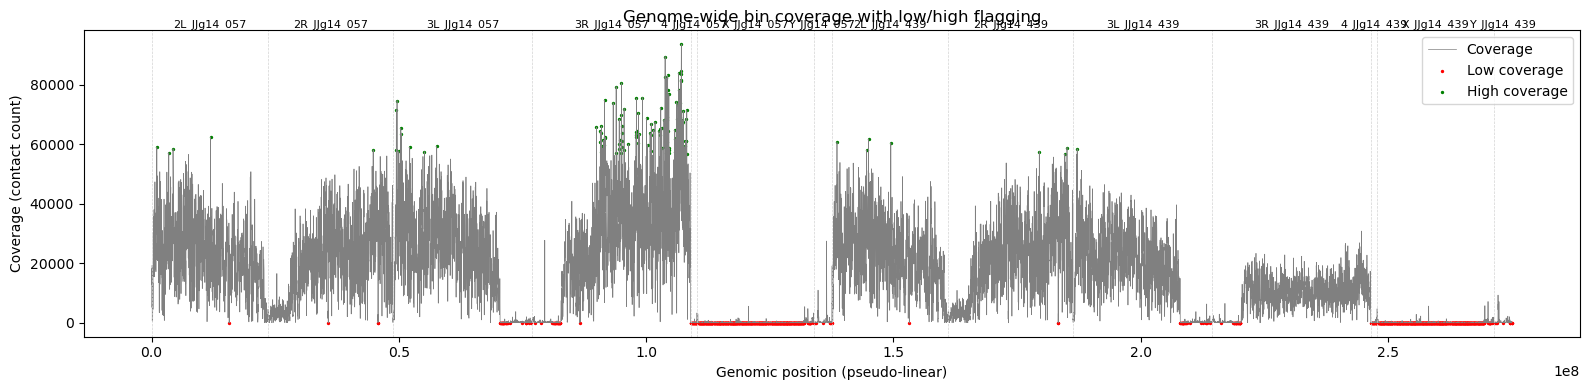

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume `bins` has columns: chrom, start, end, coverage, low_coverage, high_coverage
# Sort chromosomes and calculate genome-wide bin position
bins["bin_length"] = bins["end"] - bins["start"]

# Assign cumulative genomic coordinates
chrom_order = bins["chrom"].drop_duplicates().tolist()
chrom_offsets = {}
offset = 0
for chrom in chrom_order:
    chrom_len = bins[bins["chrom"] == chrom]["bin_length"].sum()
    chrom_offsets[chrom] = offset
    offset += chrom_len

bins["genomic_pos"] = bins.apply(lambda row: row["start"] + chrom_offsets[row["chrom"]], axis=1)

# Plot
plt.figure(figsize=(16, 4))
plt.plot(bins["genomic_pos"], bins["coverage"], color="gray", lw=0.5, label="Coverage")

# Overlay low and high coverage
plt.scatter(bins.loc[bins["low_coverage"], "genomic_pos"], bins.loc[bins["low_coverage"], "coverage"],
            color="red", s=2, label="Low coverage")
plt.scatter(bins.loc[bins["high_coverage"], "genomic_pos"], bins.loc[bins["high_coverage"], "coverage"],
            color="green", s=2, label="High coverage")

# Add chromosome boundaries
for chrom in chrom_order:
    plt.axvline(chrom_offsets[chrom], color="lightgray", linestyle="--", lw=0.5)
    mid = chrom_offsets[chrom] + bins[bins["chrom"] == chrom]["bin_length"].sum() / 2
    plt.text(mid, max(bins["coverage"]) * 1.05, chrom, ha="center", va="bottom", fontsize=8)

plt.xlabel("Genomic position (pseudo-linear)")
plt.ylabel("Coverage (contact count)")
plt.title("Genome-wide bin coverage with low/high flagging")
plt.legend()
plt.tight_layout()
plt.show()

Modifying the tracks for "better" visualization

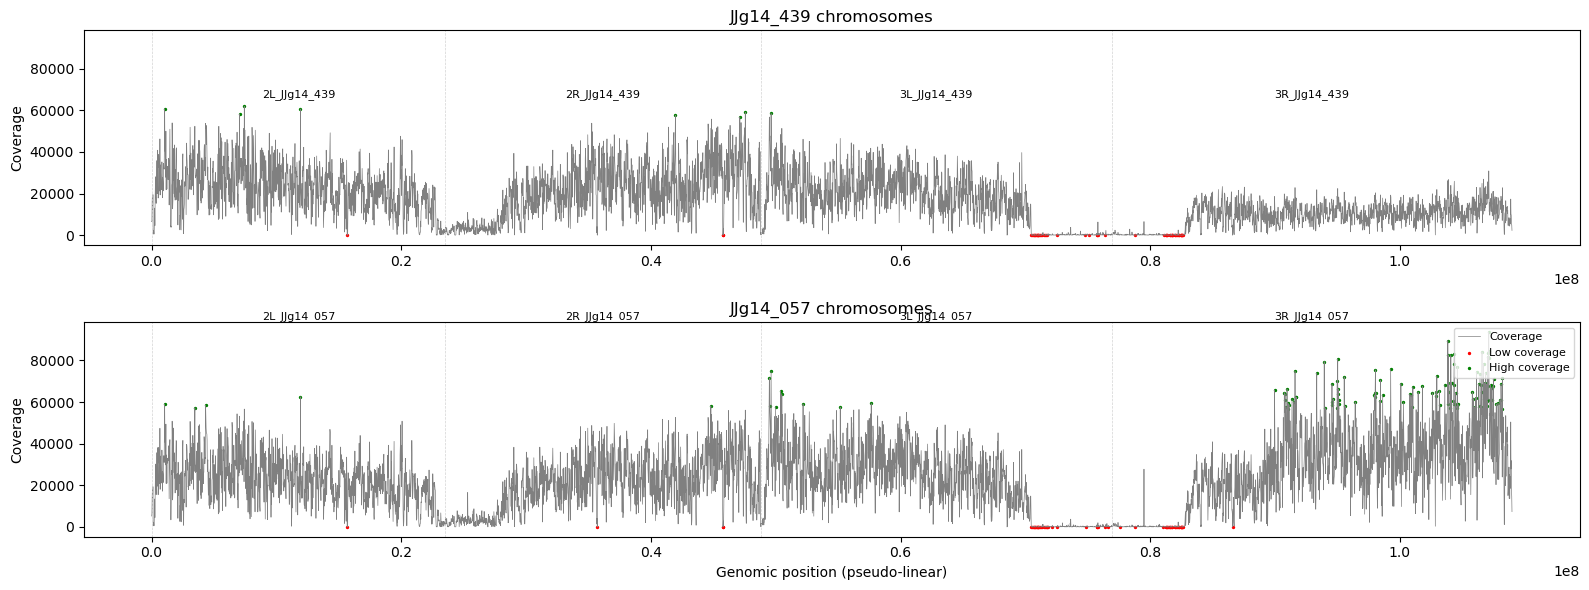

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Define your chromosome groups
track1_chroms = ["2L_JJg14_439", "2R_JJg14_439", "3L_JJg14_439", "3R_JJg14_439"]
track2_chroms = ["2L_JJg14_057", "2R_JJg14_057", "3L_JJg14_057", "3R_JJg14_057"]

# Assume `bins` is already loaded with required columns
bins["bin_length"] = bins["end"] - bins["start"]

def assign_genomic_positions(df, chrom_order):
    chrom_offsets = {}
    offset = 0
    for chrom in chrom_order:
        chrom_len = df[df["chrom"] == chrom]["bin_length"].sum()
        chrom_offsets[chrom] = offset
        offset += chrom_len
    df = df[df["chrom"].isin(chrom_order)].copy()
    df["genomic_pos"] = df.apply(lambda row: row["start"] + chrom_offsets[row["chrom"]], axis=1)
    return df, chrom_offsets

# Create subsets
track1_bins, track1_offsets = assign_genomic_positions(bins, track1_chroms)
track2_bins, track2_offsets = assign_genomic_positions(bins, track2_chroms)

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 6), sharey=True, sharex=False)

def plot_track(ax, data, chrom_offsets, title):
    ax.plot(data["genomic_pos"], data["coverage"], color="gray", lw=0.5, label="Coverage")
    ax.scatter(data.loc[data["low_coverage"], "genomic_pos"], data.loc[data["low_coverage"], "coverage"],
               color="red", s=2, label="Low coverage")
    ax.scatter(data.loc[data["high_coverage"], "genomic_pos"], data.loc[data["high_coverage"], "coverage"],
               color="green", s=2, label="High coverage")

    for chrom in chrom_offsets:
        ax.axvline(chrom_offsets[chrom], color="lightgray", linestyle="--", lw=0.5)
        mid = chrom_offsets[chrom] + data[data["chrom"] == chrom]["bin_length"].sum() / 2
        ax.text(mid, data["coverage"].max() * 1.05, chrom, ha="center", va="bottom", fontsize=8)

    ax.set_title(title)
    ax.set_ylabel("Coverage")

plot_track(ax1, track1_bins, track1_offsets, "JJg14_439 chromosomes")
plot_track(ax2, track2_bins, track2_offsets, "JJg14_057 chromosomes")

ax2.set_xlabel("Genomic position (pseudo-linear)")
ax2.legend(loc="upper right", fontsize=8)
plt.tight_layout()
plt.show()


From the cooler, filtering the chromosomes of interest. Masking the high/low coverage bins, doing the cooler balance again


In [13]:
import numpy as np

track1_chroms = ["2L_JJg14_439", "2R_JJg14_439", "3L_JJg14_439", "3R_JJg14_439"]
track2_chroms = ["2L_JJg14_057", "2R_JJg14_057", "3L_JJg14_057", "3R_JJg14_057"]

# Load the cooler file
clr = cooler.Cooler("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250403_PnMs_merged_diploidGenome.20kb.cool")

# Filter chromosomes
target_chroms = track1_chroms + track2_chroms
bins = clr.bins()[:]

pixel_table = clr.pixels()[:]
coverage = pixel_table.groupby('bin1_id')['count'].sum()

# Map coverage to bins
bins['coverage'] = coverage.reindex(bins.index).fillna(0)

# Thresholds for low and high coverage
low_thresh = bins['coverage'].quantile(0.05)
high_thresh = bins['coverage'].quantile(0.95)

# Create mask for valid bins
valid_bins_mask = (bins['coverage'] >= low_thresh) & (bins['coverage'] <= high_thresh)

chrom_mask = bins['chrom'].isin(target_chroms)
final_mask = valid_bins_mask & chrom_mask
# Mask for balancing: 1 for valid bins, 0 or NaN for excluded
weight_mask = final_mask.astype(float)

weight_mask .to_csv("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250403_PnMs_merged_diploidGenome.20kb.bin_mask.txt", index=False, header=False)
